<a href="https://colab.research.google.com/github/linyubo/CE888code/blob/main/assginment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download econml

In [1]:
!pip install econml

     |████████████████████████████████| 3.3 MB 6.3 MB/s 
     |████████████████████████████████| 123 kB 54.0 MB/s 
     |████████████████████████████████| 356 kB 41.4 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491655 sha256=5955925440aa30087c09025d335a3006878fe364a209f8788832eeecb3235afc
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


Import libaries

In [2]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/jobs.npz

--2022-02-23 13:48:12--  https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz [following]
--2022-02-23 13:48:13--  https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174506 (170K) [application/octet-stream]
Saving to: ‘ihdp.npz’

ihdp.npz            100%[===================>] 170.42K  --.-KB/s    in 0.02s   

2022-02-23 13:48:13 (6.86 MB/s) - ‘ihdp.npz’ saved [174506/174506]

--2022-02-23 13:48:13-- 

Load the data

In [4]:
ihdp = np.load('ihdp.npz')
jobs = np.load('jobs.npz')

In [5]:
ihdp.files

['x', 't', 'yf', 'ycf', 'ite']

In [6]:
for f in ihdp.files:
  print(f'{f}: {ihdp[f].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


In [7]:
ihdp['x']

array([[ 1.39739503,  0.99634625, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26903265,  0.19681812,  0.38382797, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05153683,  1.79587438, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.04522851, -1.33727611,  1.12855393, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11573459, -0.60271001, -1.10562395, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.41901117,  1.39611031, -0.73326097, ...,  0.        ,
         0.        ,  1.        ]])

In [8]:
ihdp['x'][0]

array([ 1.39739503,  0.99634625, -1.10562395, -0.87960599,  0.30856884,
       -1.02340239,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [9]:
jobs.files

['x', 't', 'y', 'e']

In [10]:
for f in jobs.files:
  print(f'{f}: {jobs[f].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In [11]:
for i in range(6):
  print(np.mean(jobs['x'][:,i]))

2.013056941287955e-16
-1.880327912192046e-16
0.3742216687422167
0.04887920298879203
0.7079701120797012
0.411892901618929


preprocessing data

In [12]:
x_ihdp_flat = ihdp['x'].reshape(-1,1)
x_ihdp = ihdp['x']
t_ihdp = ihdp['t'].reshape(-1,1)
yf_ihdp = ihdp['yf'].reshape(-1,1)
ycf_ihdp = ihdp['ycf'].reshape(-1,1)
ite_ihdp = ihdp['ite']

In [13]:
nan_idhp = np.isnan(ihdp['x'])
nan_idhp.any()

False

In [14]:
for i in range(6):
  print(np.max(x_ihdp[:,i]))

1.50547572167296
2.59540250665916
2.99036883104816
2.24431955769879
2.37163652074099
2.9513718820876


In [15]:
for i in range(6):
  print(np.min(x_ihdp[:,i]))

-2.7312872380599
-3.80082251836664
-1.85034990845987
-0.879605988141577
-5.13042776464339
-1.85148036262872


In [16]:
for i in range(6):
  print(np.mean(x_ihdp[:,i]))

3.4480822183806733e-17
4.755975473628515e-18
-2.3779877368142576e-17
-5.612051058881648e-16
4.042579152584238e-17
-7.633340635173767e-16


In [17]:
for i in range(6):
  print(np.median(x_ihdp[:,i]))

0.165275193594202
0.196818122274482
-0.360897988611247
0.161702527138546
0.121017235125678
-0.0297088215294272


In [18]:
for i in range(6):
  print(np.std(x_ihdp[:,i]))

0.9993304317963723
0.9993304317963723
0.9993304317963725
0.9993304317963722
0.9993304317963723
0.9993304317963719


In [19]:
print(np.max(yf_ihdp))
print(np.max(ycf_ihdp))
print(np.max(ite_ihdp))

11.2682277695966
10.17100383354
4.6701246440039546


In [20]:
print(np.min(yf_ihdp))
print(np.min(ycf_ihdp))
print(np.min(ite_ihdp))

-1.54390231866209
-1.03762755274036
-1.8669886040441002


In [34]:
print(np.std(yf_ihdp))
print(np.std(ycf_ihdp))
print(np.std(ite_ihdp))

2.1784964500546247
1.978794798341327
0.8591605233778311


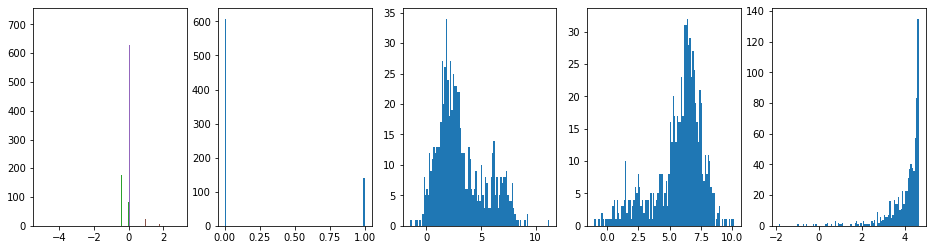

In [21]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
axs[0].hist(x_ihdp, bins=bins)
axs[1].hist(t_ihdp, bins=bins)
axs[2].hist(yf_ihdp, bins=bins)
axs[3].hist(ycf_ihdp, bins=bins)
axs[4].hist(ite_ihdp, bins=bins)
plt.show()

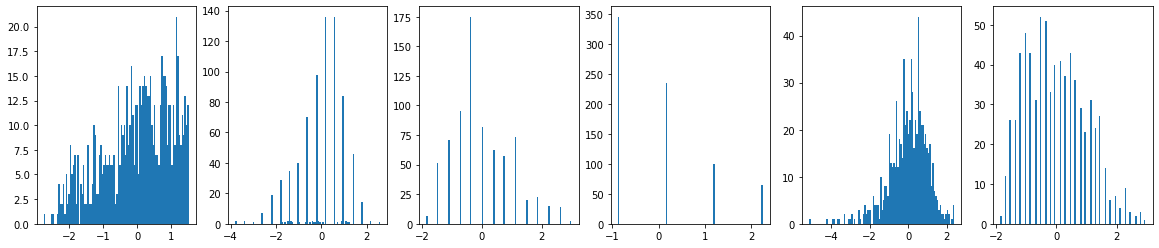

In [22]:
bins=100
fig, axs = plt.subplots(1, 6, figsize=(20, 4))
axs[0].hist(x_ihdp[:,0], bins=bins)
axs[1].hist(x_ihdp[:,1], bins=bins)
axs[2].hist(x_ihdp[:,2], bins=bins)
axs[3].hist(x_ihdp[:,3], bins=bins)
axs[4].hist(x_ihdp[:,4], bins=bins)
axs[5].hist(x_ihdp[:,5], bins=bins)
plt.show()

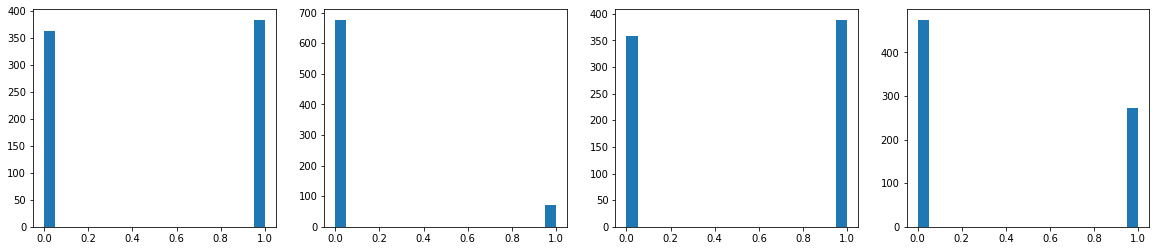

In [23]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(x_ihdp[:,6], bins=bins)
axs[1].hist(x_ihdp[:,7], bins=bins)
axs[2].hist(x_ihdp[:,8], bins=bins)
axs[3].hist(x_ihdp[:,9], bins=bins)
plt.show()

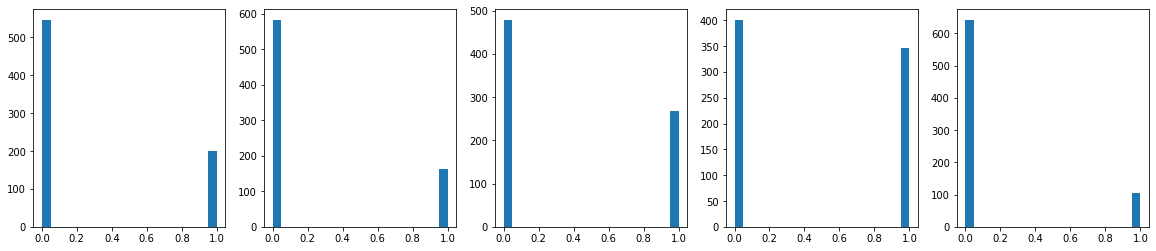

In [24]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,10], bins=bins)
axs[1].hist(x_ihdp[:,11], bins=bins)
axs[2].hist(x_ihdp[:,12], bins=bins)
axs[3].hist(x_ihdp[:,13], bins=bins)
axs[4].hist(x_ihdp[:,14], bins=bins)
plt.show()

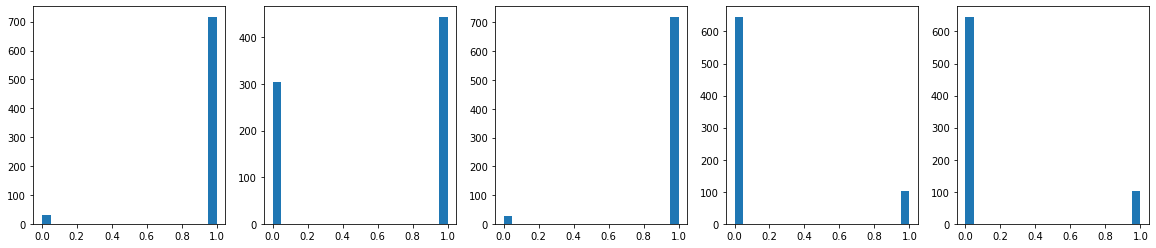

In [25]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,15], bins=bins)
axs[1].hist(x_ihdp[:,16], bins=bins)
axs[2].hist(x_ihdp[:,17], bins=bins)
axs[3].hist(x_ihdp[:,18], bins=bins)
axs[4].hist(x_ihdp[:,19], bins=bins)
plt.show()

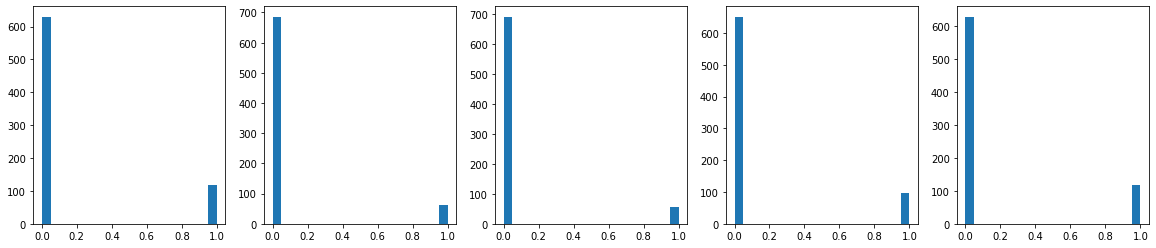

In [26]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_ihdp[:,20], bins=bins)
axs[1].hist(x_ihdp[:,21], bins=bins)
axs[2].hist(x_ihdp[:,22], bins=bins)
axs[3].hist(x_ihdp[:,23], bins=bins)
axs[4].hist(x_ihdp[:,24], bins=bins)
plt.show()

In [27]:
x_jobs_flat = jobs['x'].reshape(-1,1)
x_jobs = jobs['x']
t_jobs = jobs['t'].reshape(-1,1)
y_jobs = jobs['y'].reshape(-1,1)
e_jobs = jobs['e'].reshape(-1,1)

In [28]:
jobs['x'][0]

array([-0.61428209,  1.46472657,  0.        ,  0.        ,  1.        ,
        0.        ,  2.39325   ,  2.74619647, -0.65331121, -0.65691271,
        1.62753104,  2.46233663,  2.93724407,  0.        ,  0.        ,
        2.84390896,  0.        ])

In [36]:
for i in [0,1,6,7,8,9,10,11,12,15]:
  print(np.max(x_jobs[:,i]))

2.1143372756571006
1.8054494710632873
8.751987463455608
10.16506764568288
2.446736878867096
2.7733355859829296
2.113701579040823
23.05284075572758
29.022641032904374
7.13603049365373


In [37]:
for i in [0,1,6,7,8,9,10,11,12,15]:
  print(np.min(x_jobs[:,i]))

-1.4610949961930897
-3.9868397720589073
-1.1474106272396363
-1.1104674465327902
-1.164047106708605
-0.9488315641570118
-2.1439737169943367
-0.5580568483682105
-0.5188150629967283
-0.9799811254456631


In [38]:
for i in [0,1,6,7,8,9,10,11,12,15]:
  print(np.std(x_jobs[:,i]))

0.9998443216305639
0.999844321630573
0.9998443216305609
0.9998443216305719
0.9998443216305611
0.9998443216305588
0.9998443216305551
0.9998443216305549
0.9998443216305758
0.9998443216305577


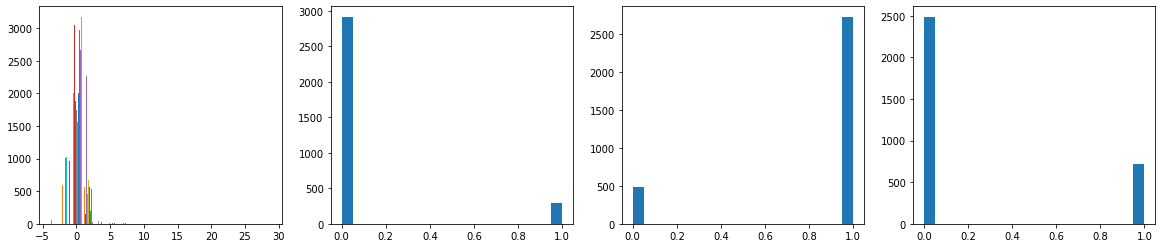

In [29]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
axs[0].hist(x_jobs, bins=bins)
axs[1].hist(t_jobs, bins=bins)
axs[2].hist(y_jobs, bins=bins)
axs[3].hist(e_jobs, bins=bins)
plt.show()

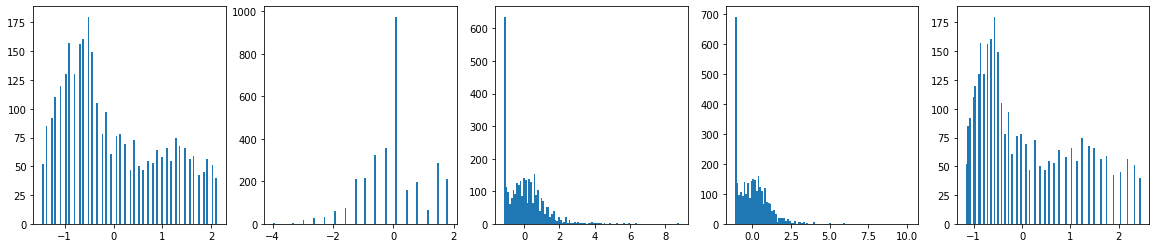

In [30]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_jobs[:,0], bins=bins)
axs[1].hist(x_jobs[:,1], bins=bins)
axs[2].hist(x_jobs[:,6], bins=bins)
axs[3].hist(x_jobs[:,7], bins=bins)
axs[4].hist(x_jobs[:,8], bins=bins)
plt.show()

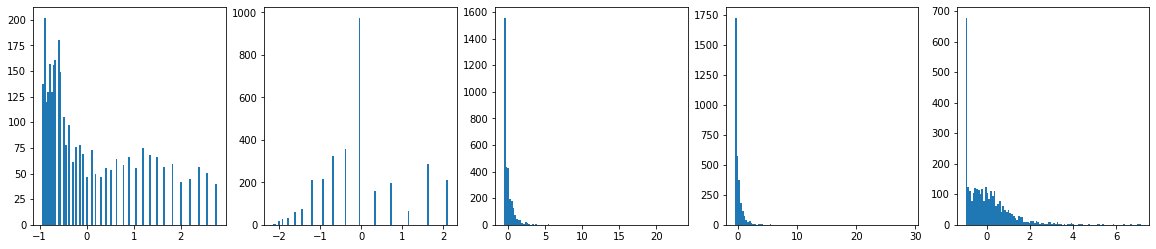

In [31]:
bins=100
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs[0].hist(x_jobs[:,9], bins=bins)
axs[1].hist(x_jobs[:,10], bins=bins)
axs[2].hist(x_jobs[:,11], bins=bins)
axs[3].hist(x_jobs[:,12], bins=bins)
axs[4].hist(x_jobs[:,15], bins=bins)
plt.show()

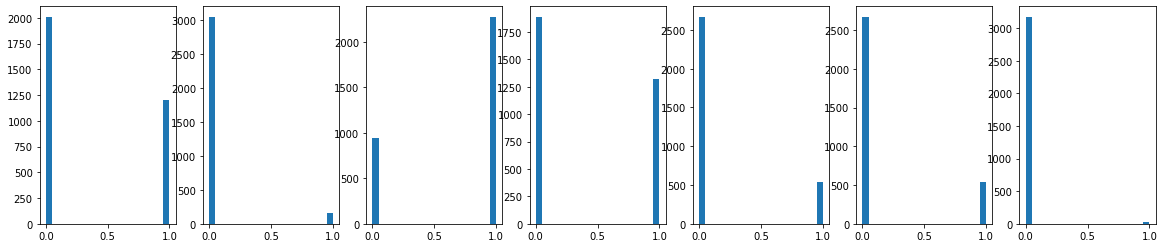

In [32]:
bins=20
fig, axs = plt.subplots(1, 7, figsize=(20, 4))
axs[0].hist(x_jobs[:,2], bins=bins)
axs[1].hist(x_jobs[:,3], bins=bins)
axs[2].hist(x_jobs[:,4], bins=bins)
axs[3].hist(x_jobs[:,5], bins=bins)
axs[4].hist(x_jobs[:,13], bins=bins)#strange
axs[5].hist(x_jobs[:,14], bins=bins)
axs[6].hist(x_jobs[:,16], bins=bins)#strange 
plt.show()

In [33]:
nan_jobs=np.isnan(jobs['x'])
nan_jobs.any()

False